In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x_grid = np.linspace(-20.0, 10.0, 100)

### $H_{0}$

In [3]:
mu_H0 = -3.0
sigma_H0 = 2.0

In [4]:
pdf_H0 = scipy.stats.norm.pdf(x_grid, loc=mu_H0, scale=sigma_H0)

### $H_{1}$

In [5]:
mu_H1 = 1.0
sigma_H1 = 2.0

In [6]:
pdf_H1 = scipy.stats.norm.pdf(x_grid, loc=mu_H1, scale=sigma_H1)

## Distributions

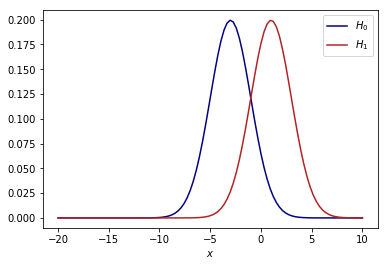

In [7]:
fig, ax = plt.subplots()
ax.plot(x_grid, pdf_H0, c='navy', label='$H_{0}$')
ax.plot(x_grid, pdf_H1, c='firebrick', label='$H_{1}$')
ax.set_xlabel('$x$')
ax.legend()

Ratio of the distributions

In [8]:
pdf_ratio_H0H1 = pdf_H0/pdf_H1

Text(0.5,0,'$x$')

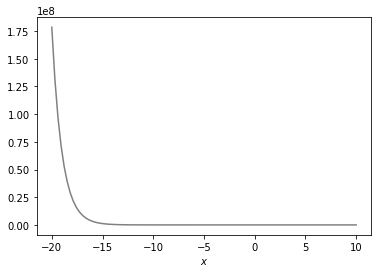

In [9]:
fig, ax = plt.subplots()
ax.plot(x_grid, pdf_ratio_H0H1, c='grey')
ax.set_xlabel('$x$')

Neyman-Pearson Test

In [10]:
def ConstructNeymanPearsonTest(distr1, distr2, c):
    def NeymanPearsonTest(x):
        
        r = distr1.pdf(x) / distr2.pdf(x)
        if r < c:
            return False
        else:
            return True
    return NeymanPearsonTest

In [11]:
distr1 = scipy.stats.norm(loc=mu_H0, scale=sigma_H0)
distr2 = scipy.stats.norm(loc=mu_H1, scale=sigma_H1)

In [12]:
NPT = ConstructNeymanPearsonTest(distr1, distr2, 0.1)

In [13]:
NPT_result = np.array([NPT(x) for x in x_grid])
NPT_accept = NPT_result == True
NPT_reject = ~NPT_accept

In [14]:
NPT_accept_boundary1 = np.where(NPT_accept)[0][0]
NPT_accept_boundary2 = np.where(NPT_accept)[0][-1]

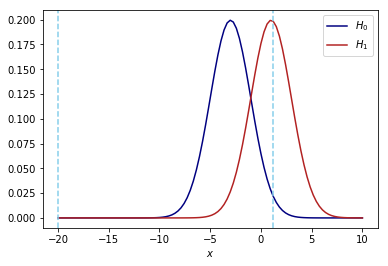

In [15]:
fig, ax = plt.subplots()
ax.plot(x_grid, pdf_H0, c='navy', label='$H_{0}$')
ax.plot(x_grid, pdf_H1, c='firebrick', label='$H_{1}$')
ax.axvline(x_grid[NPT_accept_boundary1], linestyle='--', c='skyblue')
ax.axvline(x_grid[NPT_accept_boundary2], linestyle='--', c='skyblue')

ax.set_xlabel('$x$')
ax.legend()

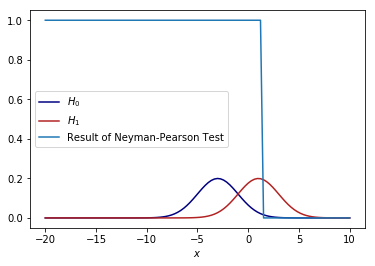

In [16]:
fig, ax = plt.subplots()
ax.plot(x_grid, pdf_H0, c='navy', label='$H_{0}$')
ax.plot(x_grid, pdf_H1, c='firebrick', label='$H_{1}$')
ax.plot(x_grid, NPT_result, label='Result of Neyman-Pearson Test')
ax.set_xlabel('$x$')
ax.legend()

In [17]:
cl

NameError: name 'cl' is not defined